In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import cspy
import os

In [5]:
A = [1,2,3,4,5]
B = [6,7,8]
A.extend(B)
print(A)

[1, 2, 3, 4, 5, 6, 7, 8]


In [2]:
N = 5 # last is the source
coords = np.asarray([[0,0], [1,0], [0,1], [1,1], [0,0]])
G = nx.DiGraph(directed=True, n_res=2) #res = [?, demand]
for i in range(N):
    name_i = "Source" if i == 0 else str(i)
    for j in range(N):
        name_j = "Sink" if j == N-1 else str(j)
        demand_j = 0 if j == N-1 else j
        if (i != j):
            if (i == 0) and (j == N-1):
                continue
            if (i == N-1) or (j == 0):
                continue
            
            dist = np.round(np.sqrt(np.sum((coords[i] - coords[j])**2)),1)
            if (i==1 and j == 3):
                dist = np.inf
            G.add_edge(name_i, name_j, weight = dist, res_cost = np.asarray([0, demand_j]))

print(f"Edges")
for edge in G.edges(data=True):
    print(edge)

Edges
('Source', '1', {'weight': 1.0, 'res_cost': array([0, 1])})
('Source', '2', {'weight': 1.0, 'res_cost': array([0, 2])})
('Source', '3', {'weight': 1.4, 'res_cost': array([0, 3])})
('1', '2', {'weight': 1.4, 'res_cost': array([0, 2])})
('1', '3', {'weight': inf, 'res_cost': array([0, 3])})
('1', 'Sink', {'weight': 1.0, 'res_cost': array([0, 0])})
('2', '1', {'weight': 1.4, 'res_cost': array([0, 1])})
('2', '3', {'weight': 1.0, 'res_cost': array([0, 3])})
('2', 'Sink', {'weight': 1.0, 'res_cost': array([0, 0])})
('3', '1', {'weight': 1.0, 'res_cost': array([0, 1])})
('3', '2', {'weight': 1.0, 'res_cost': array([0, 2])})
('3', 'Sink', {'weight': 1.4, 'res_cost': array([0, 0])})


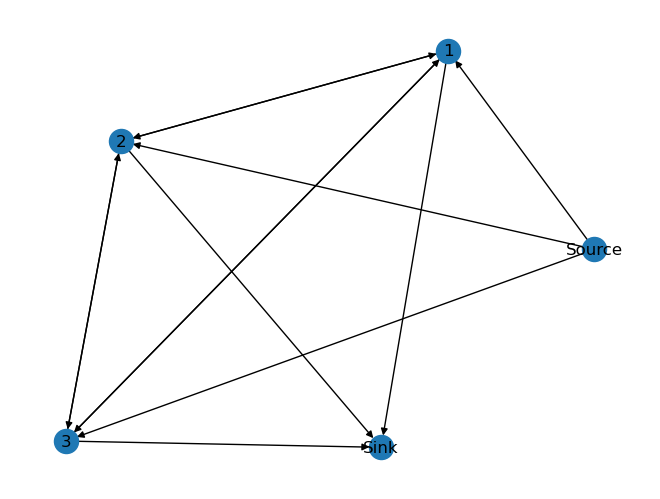

In [3]:
nx.draw_kamada_kawai(G, with_labels = True)

In [4]:
for e in G.edges:
    print(e, G.get_edge_data(e[0], e[1]))

('Source', '1') {'weight': 1.0, 'res_cost': array([0, 1])}
('Source', '2') {'weight': 1.0, 'res_cost': array([0, 2])}
('Source', '3') {'weight': 1.4, 'res_cost': array([0, 3])}
('1', '2') {'weight': 1.4, 'res_cost': array([0, 2])}
('1', '3') {'weight': inf, 'res_cost': array([0, 3])}
('1', 'Sink') {'weight': 1.0, 'res_cost': array([0, 0])}
('2', '1') {'weight': 1.4, 'res_cost': array([0, 1])}
('2', '3') {'weight': 1.0, 'res_cost': array([0, 3])}
('2', 'Sink') {'weight': 1.0, 'res_cost': array([0, 0])}
('3', '1') {'weight': 1.0, 'res_cost': array([0, 1])}
('3', '2') {'weight': 1.0, 'res_cost': array([0, 2])}
('3', 'Sink') {'weight': 1.4, 'res_cost': array([0, 0])}


In [5]:
print(f"Bidirectional")
algo = cspy.BiDirectional(G=G, max_res=[3, 3], min_res=[0, 0], elementary=True)
algo.run()
print(algo.path)
print(algo.total_cost)
print(algo.consumed_resources)

print(f"\nTabu")
algo = cspy.Tabu(G=G, max_res=[3, 3], min_res=[0, 0])
algo.run()
print(algo.path)
print(algo.total_cost)
print(algo.consumed_resources)

print(f"\nPSOLGENT")
algo = cspy.PSOLGENT(G=G, max_res=[3, 3], min_res=[0, 0])
algo.run()
print(algo.path)
print(algo.total_cost)
print(algo.consumed_resources)

print(f"\n Greedy")
algo = cspy.GreedyElim(G=G, max_res=[3, 3], min_res=[0, 0])
algo.run()
print(algo.path)
print(algo.total_cost)
print(algo.consumed_resources)

print(f"\n Grasp")
algo = cspy.GRASP(G=G, max_res=[3, 3], min_res=[0, 0])
algo.run()
print(algo.path)
print(algo.total_cost)
print(algo.consumed_resources)

Bidirectional
['Source', '1', 'Sink']
2.0
[0 1]

Tabu
['Source', '2', 'Sink']
2.0
[0. 2.]

PSOLGENT
['Source', '1', '2', 'Sink']
3.4
[0. 3.]

 Greedy
['Source', '2', 'Sink']
2.0
[0. 2.]

 Grasp


c:\Users\zente\anaconda3\envs\pizza\Lib\site-packages\cspy\algorithms\grasp.py:20: SyntaxWarning: invalid escape sequence '\g'
  """


TypeError: Population must be a sequence.  For dicts or sets, use sorted(d).

In [12]:
from cspy import GRASP
from networkx import DiGraph
from numpy import array
G = DiGraph(directed=True, n_res=2)
G.add_edge('Source', 'A', res_cost=array([1, 1]), weight=1)
G.add_edge('Source', 'B', res_cost=array([1, 1]), weight=1)
G.add_edge('Source', 'C', res_cost=array([10, 1]), weight=10)
G.add_edge('A', 'C', res_cost=array([1, 1]), weight=1)
G.add_edge('A', 'E', res_cost=array([10, 1]), weight=10)
G.add_edge('A', 'F', res_cost=array([10, 1]), weight=10)
G.add_edge('B', 'C', res_cost=array([2, 1]), weight=-1)
G.add_edge('B', 'F', res_cost=array([10, 1]), weight=10)
G.add_edge('B', 'E', res_cost=array([10, 1]), weight=10)
G.add_edge('C', 'D', res_cost=array([1, 1]), weight=-1)
G.add_edge('D', 'E', res_cost=array([1, 1]), weight=1)
G.add_edge('D', 'F', res_cost=array([1, 1]), weight=1)
G.add_edge('D', 'Sink', res_cost=array([10, 10]), weight=10)
G.add_edge('F', 'Sink', res_cost=array([10, 1]), weight=1)
G.add_edge('E', 'Sink', res_cost=array([1, 1]), weight=1)
grasp = GRASP(G, [5, 5], [0, 0], max_iter=50,
                max_localiter=10)
grasp.run()
path = grasp.path
print(path)

TypeError: Population must be a sequence.  For dicts or sets, use sorted(d).

In [6]:
int('5')

5